In [557]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://logowik.com/content/uploads/images/kahramanmaras-sutcu-imam-universitesi5139.jpg", width=400, height=400) 

  
  
  # KSÜ BİLGİSAYAR MÜHENDİSLİĞİ
 # 2023-2024 GÜZ DÖNEMİ
# VERİ MADENCİLİĞİ FİNAL PROJESİ
**------------------------------------------------------------------------------------------------**

## İÇİNDEKİLER

### 1- Problemin Belirlenmesi ve Uygun Veri Setinin Temini
**1.1-kaggle.com**

### 2- Veri Keşfi 

### 3- Hazırlık
**3.1-Veri ön işleme*

### 4- Veri Görselleştirme

### 5- Modelleme
**5.1-RFM**
**5.2-K-Means**

### 6- Sonuç

### 7- Kaynakça










  
  
  
-

## 1- Problemin Seçilmesi ve Uygun Veri Setinin Temin Edilmesi

Bu projede insanların demografik özellikleri ile alışveriş davranışları arasındaki ilişkiyi ortaya koyan bir Veri Madenciliği uygulaması gerçekleştirilmiştir. Bu uygulama için Veri Madenciliği yöntemlerinden sınıflandırma yöntemi kullanılmıştır. Veri seti Kaggle.com adresinden public olarak yayınlanan 'Customer Transactions' olarak seçilmiştir.

----

**Aşağıdaki kütüphaneleri kullanacağız:**

**Numpy:** Sayısal hesaplama kütüphanesi.

**Pandas:** Veri işleme ve analiz kütüphanesi.

**Matplotlib:** Veri görselleştirme kütüphanesi.

**Seaborn:** İstatistiksel veri görselleştirme kütüphanesi.

**Scipy:** Bilimsel hesaplama için kapsamlı sayısal algoritma ve araç kütüphanesi.

**Datetime:** Tarih ve zaman işlemleri kütüphanesi.

In [558]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [559]:
df = pd.read_csv('Customer.csv')

In [560]:
df

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


-

## 2- HAZIRLIK 
### 2.1-Veri Madenciliği uygulamasında kullanılacak olan modelin incelenmesi

Veri setimizi incelediğimizde; **50000** adet müşteriye ait **9** farklı özellik içerdiğini görmekteyiz. Bu veri setinde hangi müşterinin, 2023 yılının Ocak ve Ekim ayları arasındaki tarihlerde, ne kadar ve hangi firmadan alışveriş yaptığı bilgisine ulaşılabilir. Bu demografik özelliklerden yola çıkarak özellikle farklı yaş ve cinsiyete sahip insanların alışveriş davranışlarını ortaya koyacağız.

Veri ön işleme aşamasında;
**Tekrar eden, ayrık ve boş (NULL)** verilerin tespiti ile daha tutarlı ve genelgeçer sonuçlar üretmeye çalışacağız.


---

### 2.1-Veri Ön İşleme

Özniteliklerin daha anlaşılabilir olması için **Türkçe** hale getirilmesi.

In [561]:
df.rename(columns={'Customer ID' : 'Musteri_ID',
                   'Name':'Isim',
                   'Surname':'Soyisim',
                   'Gender':'Cinsiyet',
                   'Birthdate':'Dogum_Tarihi',
                   'Transaction Amount':'Yapilan_Harcama',
                   'Date':'Harcama_Tarihi',
                   'Merchant Name':'Satici',
                   'Category':'Kategori'}, inplace=True)


In [562]:
df #Veri seti ön inceleme

,Musteri_ID,Isim,Soyisim,Cinsiyet,Dogum_Tarihi,Yapilan_Harcama,Harcama_Tarihi,Satici,Kategori
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


Müşteri ID özelliğinin çıkartılması.

In [563]:
#df.drop('Müşteri ID', axis=1, inplace=True)

NULL değere sahip veri miktarının belirlenmesi.

In [564]:
df.isnull().sum()

Musteri_ID            0
Isim                  0
Soyisim               0
Cinsiyet           5047
Dogum_Tarihi          0
Yapilan_Harcama       0
Harcama_Tarihi        0
Satici                0
Kategori              0
dtype: int64

NULL verilerin silinmesi.

In [565]:
df = df.dropna()

In [566]:
df.isnull().sum()

Musteri_ID         0
Isim               0
Soyisim            0
Cinsiyet           0
Dogum_Tarihi       0
Yapilan_Harcama    0
Harcama_Tarihi     0
Satici             0
Kategori           0
dtype: int64

---

Tekrar eden verilerin kontrolünün yapılması

In [567]:
duplicates = pd.DataFrame({'HasDuplicates': [df.duplicated().any()]})
duplicates

,HasDuplicates
0,False


Tekrar eden veri bulunmamaktadır.

----

In [568]:
df.shape

(44953, 9)

---
---
**Doğum Tarihi** özniteliğinden **Yaş** özniteliğinin elde edilmesi.

In [571]:
df.loc[:,('Dogum_Tarihi')] = pd.to_datetime(df.loc[:,('Dogum_Tarihi')]) # Tarih formatına dönüşüm
df.loc[:,('Yas')] = df.loc[:,('Dogum_Tarihi')].apply(lambda x: (datetime.now().year - x.year)) # Hesaplama

print(df['Yas'])

0        22
2        43
3        47
4        73
5        23
         ..
49995    27
49996    25
49997    45
49998    43
49999    66
Name: Yas, Length: 44953, dtype: int64


In [572]:
df.head()

,Musteri_ID,Isim,Soyisim,Cinsiyet,Dogum_Tarihi,Yapilan_Harcama,Harcama_Tarihi,Satici,Kategori,Yas
0,752858,Sean,Rodriguez,F,2002-10-20 00:00:00,35.47,2023-04-03,Smith-Russell,Cosmetic,22
2,305449,Jacob,Williams,M,1981-10-25 00:00:00,115.97,2023-09-20,Steele Inc,Clothing,43
3,988259,Nathan,Snyder,M,1977-10-26 00:00:00,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,47
4,764762,Crystal,Knapp,F,1951-11-02 00:00:00,62.21,2023-06-13,Palmer-Hinton,Electronics,73
5,576539,Monica,Bartlett,F,2001-10-20 00:00:00,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,23


In [573]:
df.info() #Kontrol

<class 'pandas.core.frame.DataFrame'>
Index: 44953 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Musteri_ID       44953 non-null  int64  
 1   Isim             44953 non-null  object 
 2   Soyisim          44953 non-null  object 
 3   Cinsiyet         44953 non-null  object 
 4   Dogum_Tarihi     44953 non-null  object 
 5   Yapilan_Harcama  44953 non-null  float64
 6   Harcama_Tarihi   44953 non-null  object 
 7   Satici           44953 non-null  object 
 8   Kategori         44953 non-null  object 
 9   Yas              44953 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.8+ MB


---
Ay bazında işlem yoğunluklarının incelenmesi için **Harcama Tarihi** özniteliğinden **İşlem Tarihi** adlı ayları gösteren özniteliğinin elde edilmesi.

In [575]:
#df.loc[:, 'İşlem Tarihi'] = pd.to_datetime(df.loc[:, 'Harcama Tarihi']).dt.strftime('%B')

#print(df.loc[:, ['Harcama Tarihi', 'İşlem Tarihi']])




df.loc[:,'Ay']=df.loc[:,'Harcama_Tarihi'].str.slice(5,7)
df.loc[:,'Ay']=df.loc[:,'Ay'].astype('int64')
df.head()




,Musteri_ID,Isim,Soyisim,Cinsiyet,Dogum_Tarihi,Yapilan_Harcama,Harcama_Tarihi,Satici,Kategori,Yas,Ay
0,752858,Sean,Rodriguez,F,2002-10-20 00:00:00,35.47,2023-04-03,Smith-Russell,Cosmetic,22,4
2,305449,Jacob,Williams,M,1981-10-25 00:00:00,115.97,2023-09-20,Steele Inc,Clothing,43,9
3,988259,Nathan,Snyder,M,1977-10-26 00:00:00,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,47,1
4,764762,Crystal,Knapp,F,1951-11-02 00:00:00,62.21,2023-06-13,Palmer-Hinton,Electronics,73,6
5,576539,Monica,Bartlett,F,2001-10-20 00:00:00,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,23,8


In [665]:
df['Cinsiyet'] = df.loc[:,'Cinsiyet'].replace({'F': 1, 'M': 0})

In [667]:
df.loc[:,'Cinsiyet'] = pd.to_numeric(df['Cinsiyet'], errors='coerce', downcast='integer')
df['Ay'] = pd.to_numeric(df['Ay'], errors='coerce', downcast='integer')
#df.loc[:,'Yapilan_Harcama'] = df['Yapilan_Harcama'].astype(int)

In [668]:
# Yeni bir sütun eklemek için rastgele int değerler oluşturma
#df.loc[:,('Ziyaret')] = np.random.randint(2, 25, size=len(df))

In [669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44953 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Musteri_ID       44953 non-null  int64   
 1   Isim             44953 non-null  object  
 2   Soyisim          44953 non-null  object  
 3   Cinsiyet         44953 non-null  int64   
 4   Dogum_Tarihi     44953 non-null  object  
 5   Yapilan_Harcama  44953 non-null  float64 
 6   Harcama_Tarihi   44953 non-null  object  
 7   Satici           44953 non-null  object  
 8   Kategori         44953 non-null  object  
 9   Yas              44953 non-null  int64   
 10  Ay               44953 non-null  int8    
 11  Ziyaret          44953 non-null  int32   
 12  Toplam_Harcama   44953 non-null  float64 
 13  Age_Group        44953 non-null  category
dtypes: category(1), float64(2), int32(1), int64(3), int8(1), object(6)
memory usage: 4.4+ MB


In [582]:
df.loc[:,'Ay'] = pd.to_numeric(df.loc[:,'Ay'], errors='coerce', downcast='integer')

---

Sayısal özniteliklerin istatistiksel sonuçları incelenmesi.

In [583]:
df.describe()

,Musteri_ID,Cinsiyet,Yapilan_Harcama,Yas,Ay,Ziyaret
count,44953.000000,44953.000000,44953.000000,44953.000000,44953.000000,44953.000000
mean,500291.017307,0.505261,442.499944,47.534736,5.250729,12.999399
std,288276.249030,0.499978,632.487842,16.822202,2.730848,6.625876
min,29.000000,0.000000,5.000000,19.000000,1.000000,2.000000
25%,251207.000000,0.000000,79.000000,33.000000,3.000000,7.000000
50%,499534.000000,1.000000,182.000000,48.000000,5.000000,13.000000
75%,749999.000000,1.000000,471.000000,62.000000,8.000000,19.000000
max,999997.000000,1.000000,2999.000000,76.000000,10.000000,24.000000


In [584]:
df.shape

(44953, 12)

### Veri ön işleme aşamasında yapılan işlemler
---

1- Veri Ön işleme aşamasında ilk olarak Kategoriler uygulama esnasında daha anlaşılabilir olması için **Türkçe** çevirileri yapıldı.

2- Müşteri ID özelliğinin veri setinin çıkartıldı.

3- Kontrolün ardından sadece **Cinsiyet** özniteliğinde yer alan **NULL** veriler silindi.

4- Tekrar eden veriler kontrol edildi ve olmadığı gözlemlendi.

5- Daha açıklayıcı ve kullanılabilir olması beklenerek; **Doğum Tarihi** özniteliği kullanılarak müşterilerin yaşları hesaplandı ve veri setine **Yaş** özniteliği olarak eklendi.

6- Harcamanın aylara göre dağılımlarını incelemek için **Harcama Tarihi** özniteliğinden harcama yapılan ayları gösteren **İşlem Tarihi** adlı öznitelik elde edildi ve veri setine dahil edildi.

---

# 2.1-Veri Görselleştirme

Müşterilerin **Kadın(F)** ve **Erkek(M)** sayılarını gösteren grafiğin çizilmesi.**(F=1, M=0)**

In [671]:
contingency=pd.crosstab(df['Kategori'],df['Cinsiyet'])
contingency

Cinsiyet,0,1
Kategori,,
Clothing,3738,3663
Cosmetic,3616,3824
Electronics,3740,3794
Market,3750,3738
Restaurant,3694,3833
Travel,3702,3861


In [672]:
contingency=pd.crosstab(df['Kategori'],df['Ay'])
contingency

Ay,1,2,3,4,5,6,7,8,9,10
Kategori,,,,,,,,,,
Clothing,844,694,809,761,830,755,801,801,746,360
Cosmetic,835,732,817,745,790,768,787,812,784,370
Electronics,803,755,824,835,823,822,771,803,754,344
Market,831,729,764,721,835,785,844,806,788,385
Restaurant,807,724,850,729,845,805,848,801,782,336
Travel,789,724,850,789,823,761,852,829,790,356


<function matplotlib.pyplot.show(close=None, block=None)>

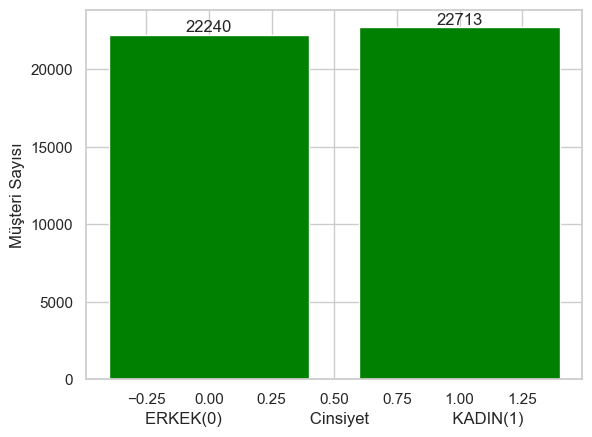

In [587]:
value_count=df['Cinsiyet'].value_counts()
bars=plt.bar( value_count.index,value_count.values, color='green')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('ERKEK(0)                   Cinsiyet                  KADIN(1)')
plt.ylabel('Müşteri Sayısı')
plt.show

---

Kategorilere göre müşteri sayılarını gösteren tablonun çizilmesi.

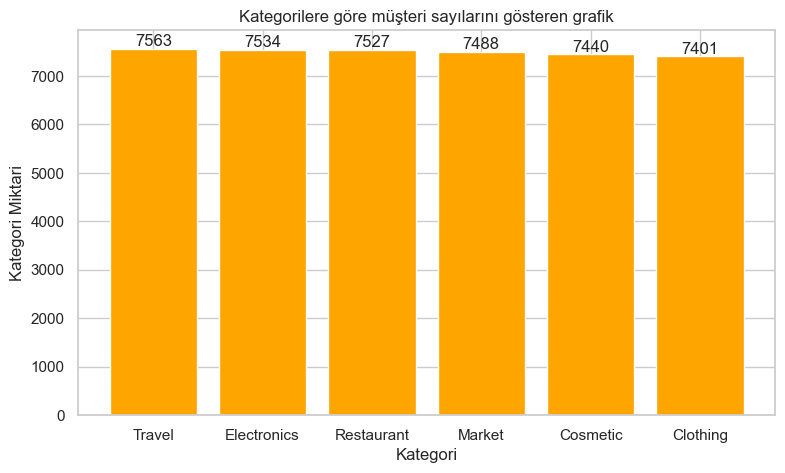

In [588]:
Kategori =df['Kategori'].value_counts()

plt.figure(figsize=(9,5))
bars = plt.bar(Kategori.index, Kategori.values, color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.ylabel('Kategori Miktari')
plt.xlabel('Kategori')
plt.title('Kategorilere göre müşteri sayılarını gösteren grafik')
plt.show()

---
Kadın müşterilerin kategorilere göre dağılımlarını gösteren grafiğin çizilmesi.

In [674]:
monthly_avg_expenses = df.groupby('Ay')['Yapilan_Harcama'].mean().reset_index()
print(monthly_avg_expenses)


   Ay  Yapilan_Harcama
0   1       432.585252
1   2       440.493804
2   3       440.878307
3   4       453.494541
4   5       446.975738
5   6       429.629259
6   7       456.303488
7   8       441.965993
8   9       443.087209
9  10       435.766155


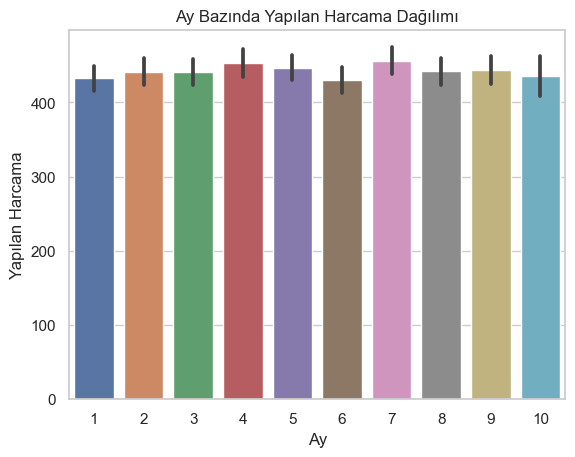

In [657]:
# Veri çerçevesindeki Ay ve Yapilan_Harcama sütunlarını kullanma
sns.barplot(x='Ay', y='Yapilan_Harcama', data=df)

# Grafiği düzenleme
plt.title('Ay Bazında Yapılan Harcama Dağılımı')
plt.xlabel('Ay')
plt.ylabel('Yapılan Ortalama Harcama')

# Grafiği gösterme
plt.show()


In [661]:
age_summary = df.groupby('Age_Group')['Yapilan_Harcama'].describe()
print(age_summary)


             count        mean         std  min   25%    50%    75%     max
Age_Group                                                                  
18-34      13250.0  438.185434  623.801806  5.0  79.0  186.0  470.0  2997.0
35-49      11426.0  441.583931  635.101352  5.0  77.0  179.0  469.0  2999.0
50-64      11622.0  446.337894  632.431621  5.0  81.0  183.0  475.0  2999.0
65+         8655.0  445.160716  642.301443  5.0  77.0  179.0  472.0  2996.0


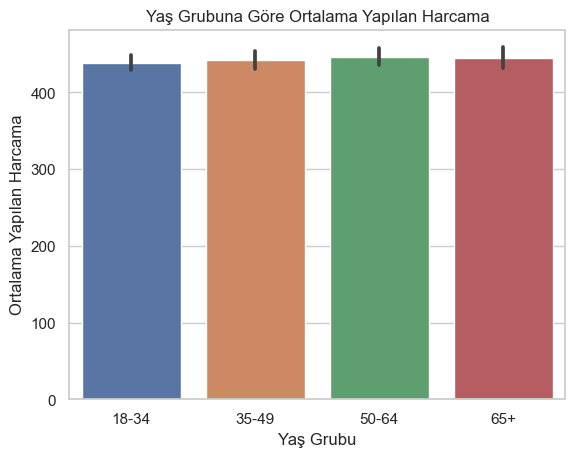

In [662]:
sns.barplot(x='Age_Group', y='Yapilan_Harcama', data=df, estimator=np.mean)
plt.title('Yaş Grubuna Göre Ortalama Yapılan Harcama')
plt.xlabel('Yaş Grubu')
plt.ylabel('Ortalama Yapılan Harcama')
plt.show()


---

Erkek müşterilerin kategorilere göre dağılımlarını gösteren grafiğin çizilmesi.

Text(0.5, 1.0, 'Erkek Müşterilerin Kategorileri')

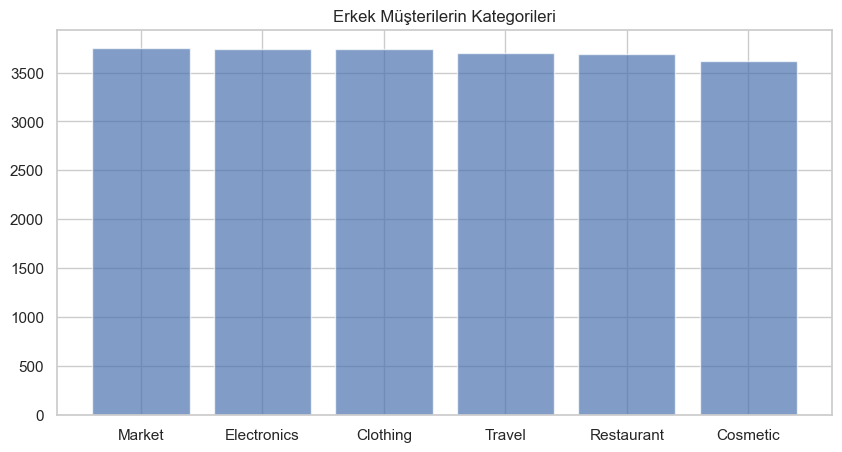

In [590]:
condition_2=df[df['Cinsiyet']==0]

males_count = condition_2['Kategori'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

axes.bar(males_count.index, males_count.values, color='b', alpha=0.7)
axes.set_title('Erkek Müşterilerin Kategorileri')

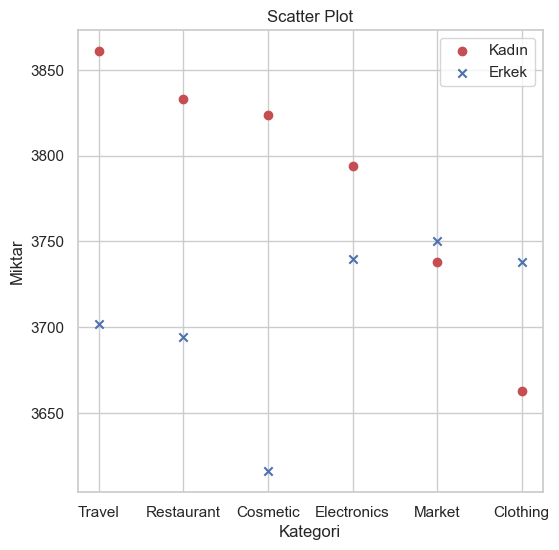

In [591]:
# Create scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(females_count.index, females_count.values, color='r', label='Kadın', marker='o')
plt.scatter(males_count.index, males_count.values, color='b', label='Erkek', marker='x')
plt.title('Scatter Plot')
plt.xlabel('Kategori')
plt.ylabel('Miktar')
plt.legend()

# Show the plot
plt.show()

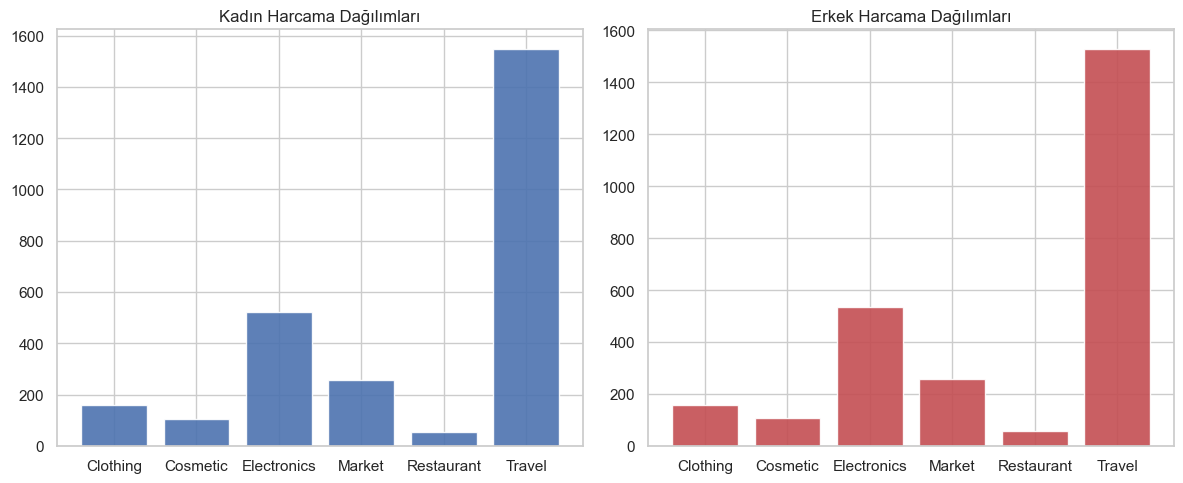

In [592]:
F=condition.groupby('Kategori')['Yapilan_Harcama'].mean()
M=condition_2.groupby('Kategori')['Yapilan_Harcama'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(F.index, F.values, color='b', alpha=0.9)
axes[0].set_title('Kadın Harcama Dağılımları')

axes[1].bar(M.index, M.values, color='r', alpha=0.9)
axes[1].set_title('Erkek Harcama Dağılımları')

plt.tight_layout()


plt.show()

In [593]:
print(df.columns)

Index(['Musteri_ID', 'Isim', 'Soyisim', 'Cinsiyet', 'Dogum_Tarihi',
       'Yapilan_Harcama', 'Harcama_Tarihi', 'Satici', 'Kategori', 'Yas', 'Ay',
       'Ziyaret'],
      dtype='object')


**Yapılan Harcama** özniteliğinin **Histogram** grafiğinde gösterimi.

<Axes: xlabel='Yapilan_Harcama', ylabel='Count'>

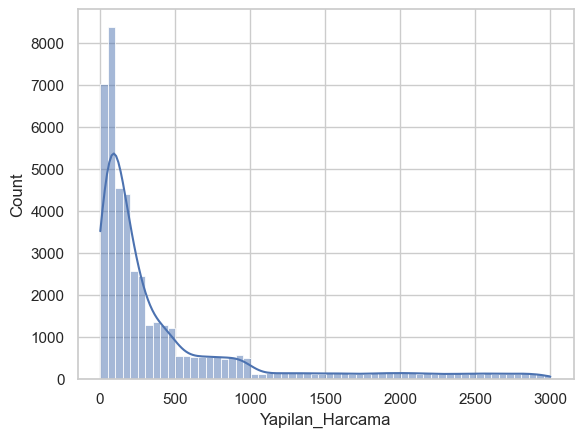

In [594]:
#data = df.rename(columns={"Yaş": "Yas", "Yapılan Harcama": "Yapilan Harcama"})
sns.histplot(x = "Yapilan_Harcama" , data = df, binwidth = 50, kde = True )

<Axes: xlabel='Yapilan_Harcama', ylabel='Count'>

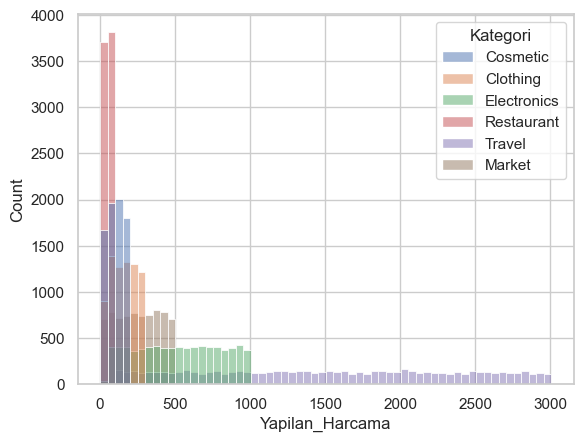

In [595]:
sns.histplot(x = "Yapilan_Harcama" , data = df, binwidth = 50, hue = "Kategori" )

--------------------------------
## 3- ANALİZ 
### 3.1-Uzaklık ve Benzerlik ölçütlerinin hesaplanması

**Yaş** özniteliğinin **ilk** ve **son** **10** değerlerinin aralarındaki **Cosine Benzerliği**, **Euclidean ve Manhattan uzaklıklarının** hesaplanması.

In [51]:
# Veri setini DataFrame'e dönüştür
df = pd.DataFrame(df, columns=['Yaş'])

# İlk 10 veriyi işaretle
df_first_5 = df.head(5)
df_last_5 = df.tail(5)

print("İlk 10 Veri:")
print(df_first_5)
print(df_last_5)

İlk 10 Veri:
   Yaş
0   21
2   42
4   72
7   55
8   66
       Yaş
25625   37
25627   60
25630   41
25631   20
25632   20


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.spatial import distance

first_5 = {'21', '42', '46', '72', '22'}
last_5 = {'37', '60', '41', '20', '21'}

# Küme içindeki sayısal değerleri listeye çevirme
first_5_list = [float(value) for value in first_5]
last_5_list = [float(value) for value in last_5]

# Listeyi NumPy dizisine dönüştürme
first_5_array = np.array(first_5_list).reshape(1, -1)
last_5_array = np.array(last_5_list).reshape(1, -1)

# Set tipine dönüştürme
first_5_set = set(first_5_list)
last_5_set = set(last_5_list)

# Cosine similarity hesapla
sim_cos = cosine_similarity(first_5_array, last_5_array)
dist_euclidean = euclidean_distances(first_5_array, last_5_array)
dist_manhattan = manhattan_distances(first_5_array, last_5_array)

print("Cosine Similarity:" , sim_cos)
print("Euclidean Distance:", dist_euclidean)
print("Manhattan Distance:", dist_manhattan)

Cosine Similarity: [[0.81245787]]
Euclidean Distance: [[58.51495535]]
Manhattan Distance: [[102.]]


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44953 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Musteri_ID       44953 non-null  int64  
 1   Isim             44953 non-null  object 
 2   Soyisim          44953 non-null  object 
 3   Cinsiyet         44953 non-null  int64  
 4   Dogum_Tarihi     44953 non-null  object 
 5   Yapilan_Harcama  44953 non-null  float64
 6   Harcama_Tarihi   44953 non-null  object 
 7   Satici           44953 non-null  object 
 8   Kategori         44953 non-null  object 
 9   Yas              44953 non-null  int64  
 10  Ay               44953 non-null  int8   
 11  Ziyaret          44953 non-null  int32  
dtypes: float64(1), int32(1), int64(3), int8(1), object(6)
memory usage: 4.0+ MB


In [82]:
df.head()

,Musteri_ID,Isim,Soyisim,Cinsiyet,Dogum_Tarihi,Yapilan_Harcama,Harcama_Tarihi,Satici,Kategori,Yas,Ay,Ziyaret
0,752858,Sean,Rodriguez,1,2002-10-20 00:00:00,35.0,2023-04-03,Smith-Russell,Cosmetic,22,4,6
2,305449,Jacob,Williams,0,1981-10-25 00:00:00,115.0,2023-09-20,Steele Inc,Clothing,43,9,3
3,988259,Nathan,Snyder,0,1977-10-26 00:00:00,11.0,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,47,1,20
4,764762,Crystal,Knapp,1,1951-11-02 00:00:00,62.0,2023-06-13,Palmer-Hinton,Electronics,73,6,19
5,576539,Monica,Bartlett,1,2001-10-20 00:00:00,99.0,2023-08-24,"Tran, Torres and Joyce",Cosmetic,23,8,21


---------
## RFM Segmentasyonu

RFM (Recency, Frequency, Monetary) segmentasyonu bu üç ana kriter temelinde sınıflandırmak için kullanılan bir analiz yöntemidir.

**Recency:** Bir müşterinin en son satın alım yaptığı dönemden bu yana geçen süreyi ifade eder. Gün bazlı bir inceleme yapılıyorsa, bir müşterinin recency değerinin 1 olması, 1 gün önce alışveriş yaptığını gösterir.

**Frequency:** Müşterinin yaptığı toplam işlem sayısı, yani satın alma sıklığıdır.

**Monetary:** Müşterinin harcama yaptığı toplam tutar, miktar olarak hesaplanır.

In [596]:
column_types = df.dtypes
print(column_types)

Musteri_ID           int64
Isim                object
Soyisim             object
Cinsiyet             int64
Dogum_Tarihi        object
Yapilan_Harcama    float64
Harcama_Tarihi      object
Satici              object
Kategori            object
Yas                  int64
Ay                    int8
Ziyaret              int32
dtype: object


In [598]:
from sklearn.cluster import KMeans
import datetime as dt

#Toplam harcama hesabı
df.loc[:,'Toplam_Harcama'] = df.loc[:,'Yapilan_Harcama']*df.loc[:,'Ziyaret']

#Harcama tarihi veri tipi değiştirme işlemi
df.loc[:, 'Harcama_Tarihi'] = pd.to_datetime(df.loc[:, 'Harcama_Tarihi'])

#Referans tarih
today = dt.datetime(2024,1,8)
print(today)

#sıfır kontrolü
df = df[df['Toplam_Harcama'] > 0]


2024-01-08 00:00:00


In [676]:
# İlk 5000 örneği seç
df_first_1500 = df.head(1500)

# Monetary ve Recency değerlerinin hesaplanması
data_x = df_first_1500.groupby('Yas').agg({'Toplam_Harcama': lambda x: x.sum(),
                                            'Harcama_Tarihi': lambda x: (today - x.max()).days})
 
data_y = df_first_1500.groupby(['Yas', 'Ziyaret']).agg({'Toplam_Harcama': lambda x: x.sum()})

# Toplam_Harcama sütununun kaç kez geçtiğini sayma işlemi
data_z = data_y.groupby('Yas').agg({'Toplam_Harcama': lambda x: len(x)})

# RFM tablosu
rfm_table = pd.merge(data_x, data_z, on='Yas')

# Sütun isimlerini belirliyoruz.
rfm_table.rename(columns={'Harcama_Tarihi': 'Recency',
                          'Toplam_Harcama_y': 'Frequency',
                          'Toplam_Harcama_x': 'Monetary'}, inplace=True)



In [679]:
rfm_table.head(10)
#rfm_table['Frequency'] = rfm_table['Frequency'].astype('int32')
#column_types = rfm_table.dtypes
#print(column_types)
#rfm_table.shape

,Monetary,Recency,Frequency
Yas,,,
19,127325.0,87,15
20,134705.0,94,16
21,146417.0,92,18
22,160311.0,88,15
23,156819.0,97,18
24,254960.0,86,15
25,217218.0,93,14
26,59013.0,103,11
27,110479.0,93,14


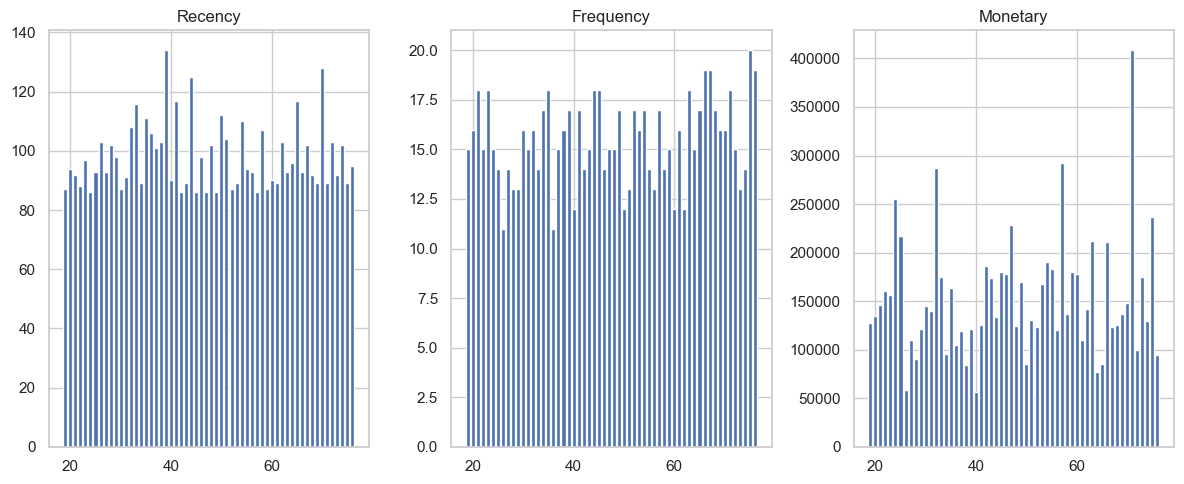

In [683]:


# Recency
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.bar(rfm_table.index, rfm_table['Recency'])
plt.title('Recency')

# Frequency
plt.subplot(1, 3, 2)
plt.bar(rfm_table.index, rfm_table['Frequency'])
plt.title('Frequency')

# Monetary
plt.subplot(1, 3, 3)
plt.bar(rfm_table.index, rfm_table['Monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.show()


In [680]:
rfm_table["Recency_score"] = pd.qcut(rfm_table['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_table["Frequency_score"] = pd.qcut(rfm_table['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_table["Monetary_score"] = pd.qcut(rfm_table['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm_table["RFM_SCORE"] = (rfm_table['Recency_score'].astype(str) + rfm_table['Frequency_score'].astype(str) + rfm_table['Monetary_score'].astype(str))

rfm_table.head(10)

,Monetary,Recency,Frequency,Recency_score,Frequency_score,Monetary_score,RFM_SCORE
Yas,,,,,,,
19,127325.0,87,15,5,2,2,522
20,134705.0,94,16,3,3,3,333
21,146417.0,92,18,4,5,3,453
22,160311.0,88,15,5,2,4,524
23,156819.0,97,18,3,5,3,353
24,254960.0,86,15,5,2,5,525
25,217218.0,93,14,3,1,5,315
26,59013.0,103,11,2,1,1,211
27,110479.0,93,14,3,2,2,322


In [603]:
rfm_table.groupby('RFM_SCORE').size().sort_values(ascending = False)[:5]

RFM_SCORE
534    3
111    2
213    2
541    2
525    2
dtype: int64

In [604]:
#İçerikleri incelemek istersek
rfm_table.groupby('RFM_SCORE').agg({
    'Recency': ['mean', 'max', 'count'],
    'Frequency': ['mean', 'max', 'count'],
    'Monetary': ['mean', 'max', 'count']
}).round(1).head()

Recency            Frequency            Monetary                
             mean  max count      mean max count      mean       max count
RFM_SCORE                                                                 
111         109.0  112     2      11.5  12     2   94651.0  104530.0     2
123         107.0  107     1      14.0  14     1  136857.0  136857.0     1
124         116.0  116     1      14.0  14     1  175131.0  175131.0     1
135         108.0  108     1      16.0  16     1  286783.0  286783.0     1
141         117.0  117     1      17.0  17     1   85292.0   85292.0     1

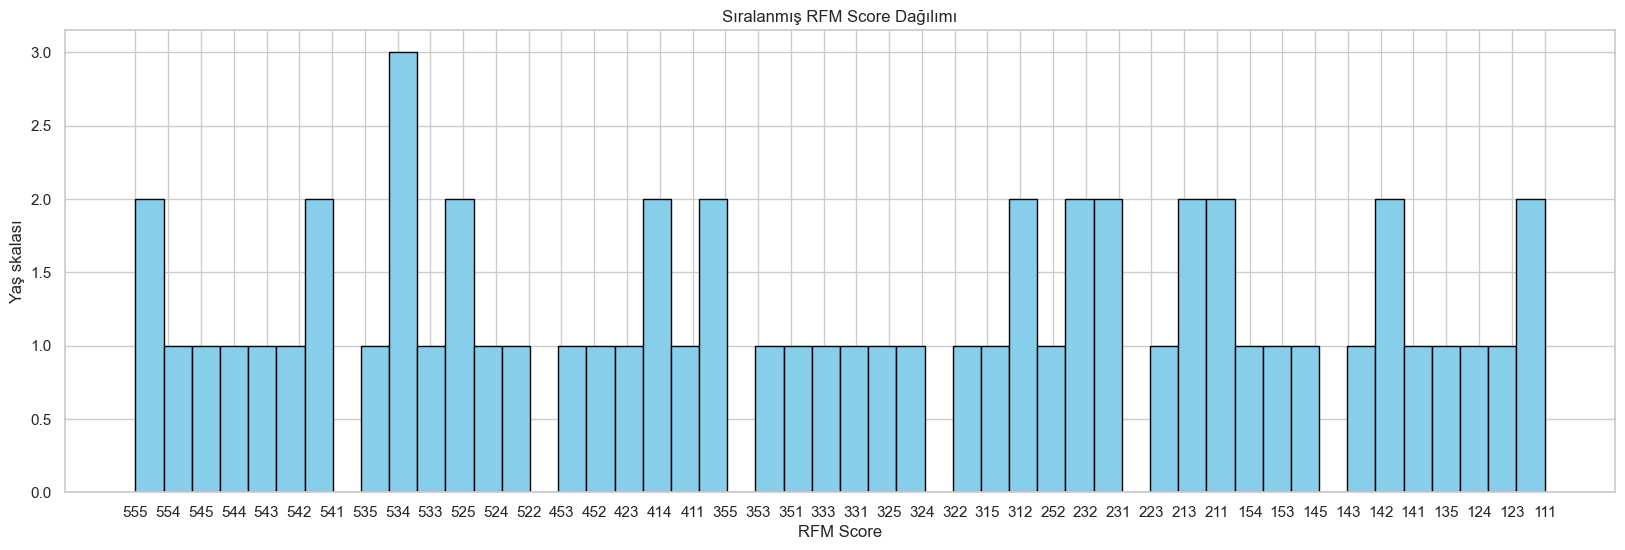

In [605]:
plt.figure(figsize=(20, 6))
sorted_rfm_scores = rfm_table['RFM_SCORE'].sort_values(ascending=False)
plt.hist(sorted_rfm_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Sıralanmış RFM Score Dağılımı')
plt.xlabel('RFM Score')
plt.ylabel('Yaş skalası')
plt.show()


------
# K-Means Segmentasyonu

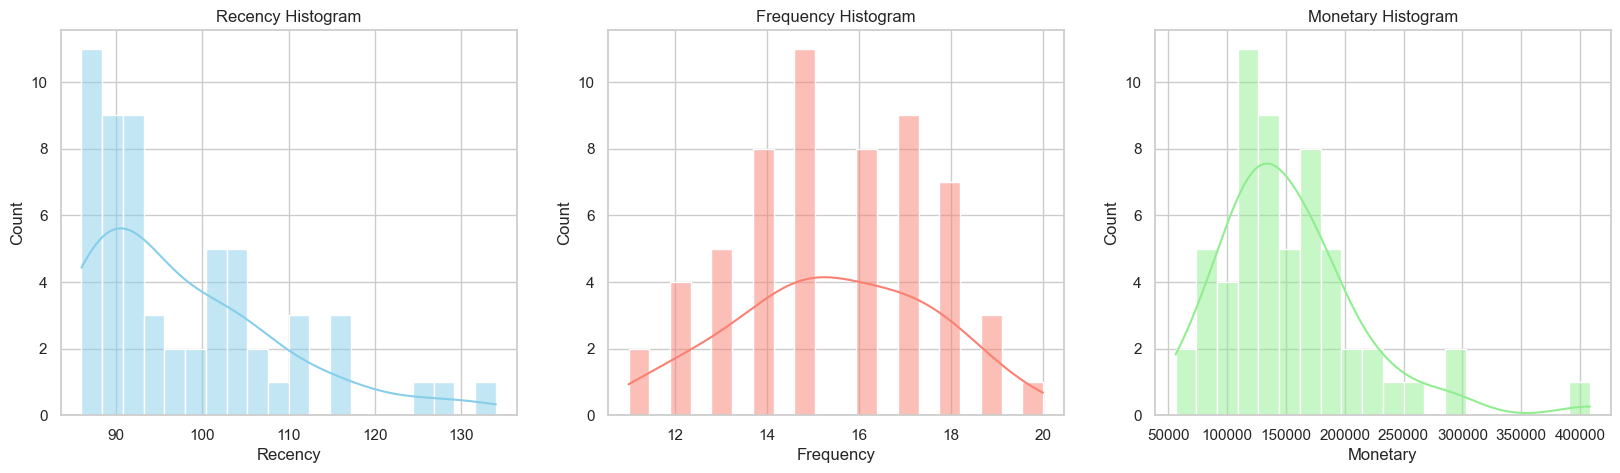

In [606]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency histogramı
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_table['Recency'], bins=20, kde=True, color='skyblue')
plt.title('Recency Histogram')

# Frequency histogramı
plt.subplot(1, 3, 2)
sns.histplot(rfm_table['Frequency'], bins=20, kde=True, color='salmon')
plt.title('Frequency Histogram')

# Monetary histogramı
plt.subplot(1, 3, 3)
sns.histplot(rfm_table['Monetary'], bins=20, kde=True, color='lightgreen')
plt.title('Monetary Histogram')

plt.show()


In [617]:
clus = rfm_table[['Monetary', 'Recency', 'Frequency']]

In [622]:
clusterdata = rfm_table.iloc[:,1:4]
clusterdata.head()

,Recency,Frequency,Recency_score
Yas,,,
19,87,15,5
20,94,16,3
21,92,18,4
22,88,15,5
23,97,18,3


In [623]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clusterdata)
data_scaled2 = pd.DataFrame(x_scaled)

In [624]:
data_scaled2.head()

,0,1,2
0,0.020833,0.444444,1.00
1,0.166667,0.555556,0.50
2,0.125000,0.777778,0.75
3,0.041667,0.444444,1.00
4,0.229167,0.777778,0.50


In [625]:
data_scaled2.describe()

,0,1,2
count,58.000000,58.000000,58.000000
mean,0.246767,0.494253,0.534483
std,0.237434,0.239279,0.384594
min,0.000000,0.000000,0.000000
25%,0.062500,0.333333,0.250000
50%,0.156250,0.444444,0.500000
75%,0.354167,0.666667,1.000000
max,1.000000,1.000000,1.000000


In [626]:
?KMeans

C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

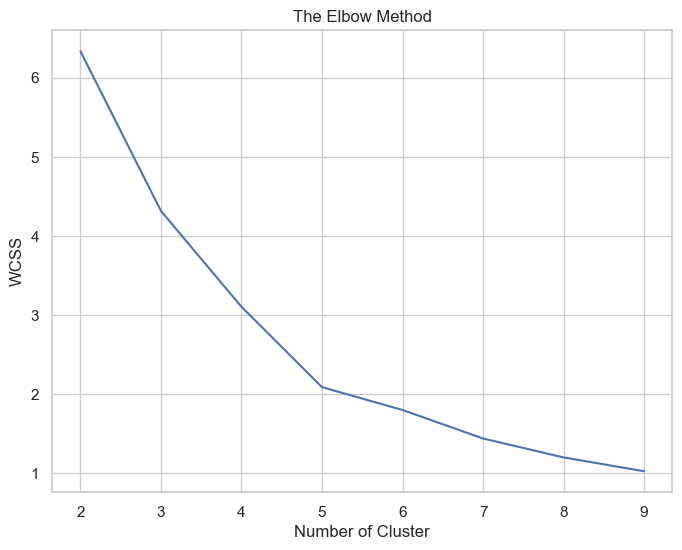

In [640]:
plt.figure(figsize=(8,6))
wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter= 200)
    kmeans.fit(data_scaled2)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

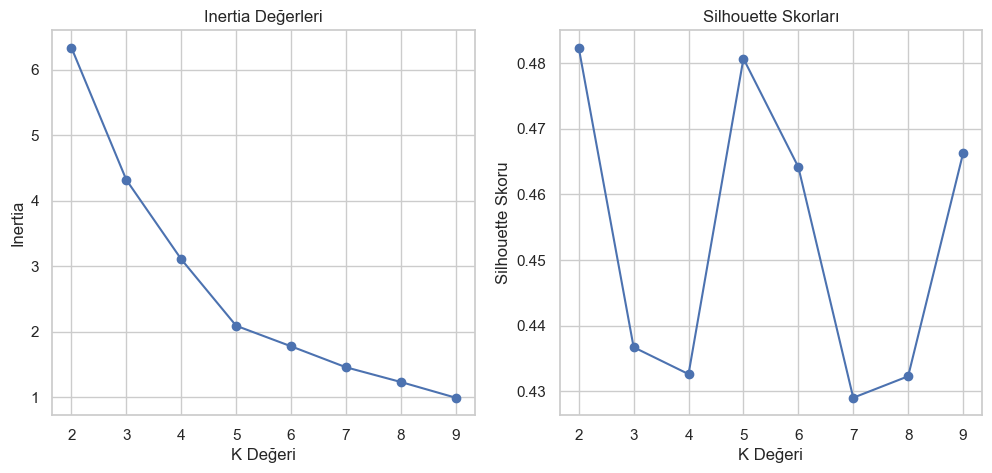

In [644]:
import matplotlib.pyplot as plt

# Inertia ve Silhouette skorlarını gösteren çizim
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Inertia değerlerini çizimle gösterin
ax1.plot(k_values, inertia_list, marker='o')
ax1.set_title('Inertia Değerleri')
ax1.set_xlabel('K Değeri')
ax1.set_ylabel('Inertia')

# Silhouette skorlarını çizimle gösterin
ax2.plot(k_values, silhouette_score_list, marker='o')
ax2.set_title('Silhouette Skorları')
ax2.set_xlabel('K Değeri')
ax2.set_ylabel('Silhouette Skoru')

plt.show()


In [628]:
#K-Means using 4 clusters and k-means++ init
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=5, max_iter=200)
kmeans.fit(data_scaled2)
pred = kmeans.predict(data_scaled2)

C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [629]:
pred = kmeans.predict(data_scaled2)

In [630]:
d_frame.head()

,Musteri_ID,Monetary,Recency,Frequency,cluster
0,752858.0,351.0,52,10,3
2,305449.0,396.0,54,20,0
3,988259.0,1748.0,306,13,7
4,764762.0,924.0,59,8,3
5,576539.0,3549.0,129,6,1


In [631]:
clusterdata = rfm_table.iloc[:,1:4]
d_frame = pd.DataFrame(rfm_table)
d_frame['cluster'] = pred
d_frame['cluster'].value_counts()

cluster
1    20
2    16
3    13
0     9
Name: count, dtype: int64

C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


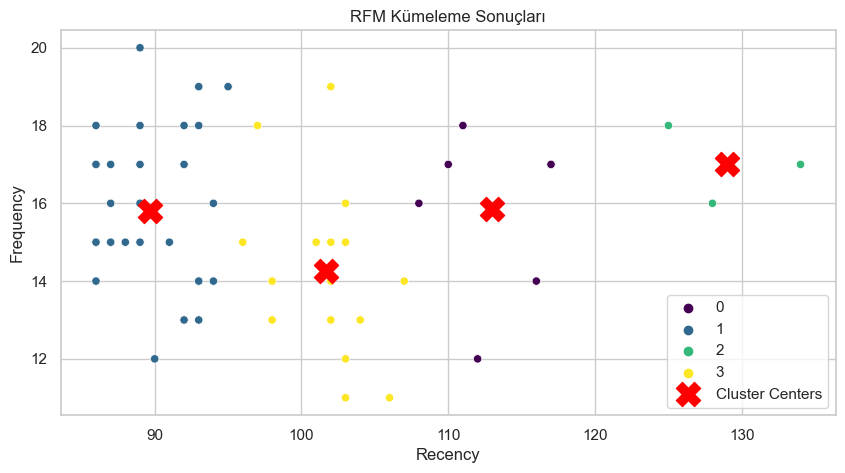

In [632]:
# Önce KMeans modelini oluşturun
num_clusters = 4  # Küme sayısını belirtin
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(d_frame[['Recency', 'Frequency']])  # X, veri setinizin uygun özelliklerini içermelidir

# Kümeleri tahmin etme
d_frame['cluster'] = kmeans.predict(d_frame[['Recency', 'Frequency']])

# Daha sonra scatter plot üzerinde gösterim için kullanın
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Recency', y='Frequency', hue='cluster', data=d_frame, palette='viridis')

# Küme merkezlerini çıkartma
cluster_centers = kmeans.cluster_centers_

# Küme merkezlerini scatter plot üzerine ekleyerek gösterme
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=300, c='red', label='Cluster Centers', alpha=1)

plt.title('RFM Kümeleme Sonuçları')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [633]:
d_frame.head()

,Monetary,Recency,Frequency,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,cluster
Yas,,,,,,,,
19,127325.0,87,15,5,2,2,522,1
20,134705.0,94,16,3,3,3,333,1
21,146417.0,92,18,4,5,3,453,1
22,160311.0,88,15,5,2,4,524,1
23,156819.0,97,18,3,5,3,353,3


In [635]:
# İlk olarak, istediğin sınıfların verilerini seçelim
selected_clusters = [0, 1, 2, 3]
selected_data = d_frame[d_frame['cluster'].isin(selected_clusters)]

# Ardından, her bir sınıfa ait Recency, Frequency ve Monetary değerlerini içeren bir tablo oluşturalım
cluster_stats = selected_data.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Tabloyu ekrana bastıralım
print(cluster_stats)


   cluster   Recency  Frequency       Monetary
0        0  113.0000  15.857143  158765.857143
1        1   89.6875  15.812500  171284.125000
2        2  129.0000  17.000000  134390.333333
3        3  101.6875  14.250000  117394.625000


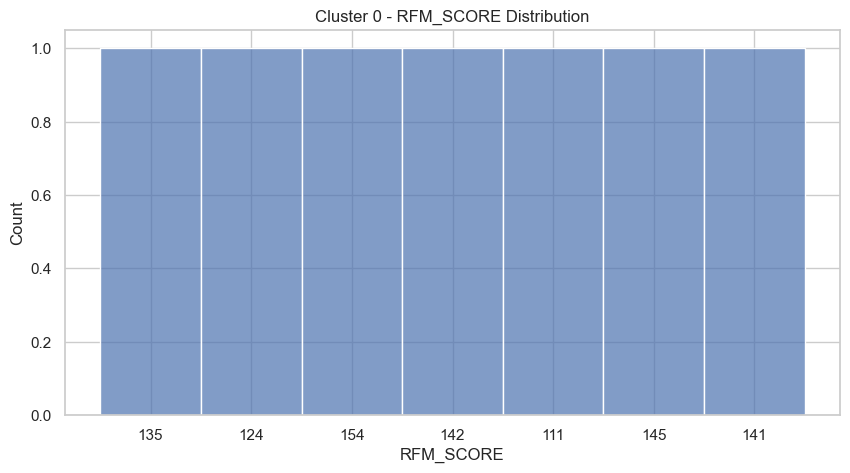

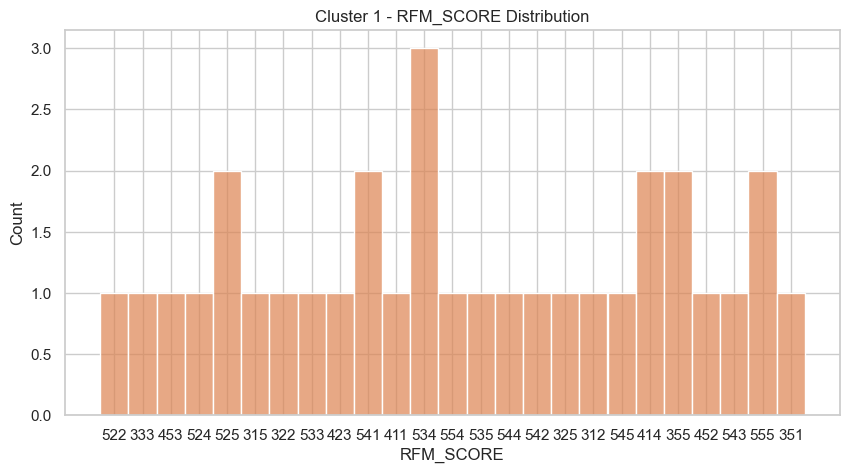

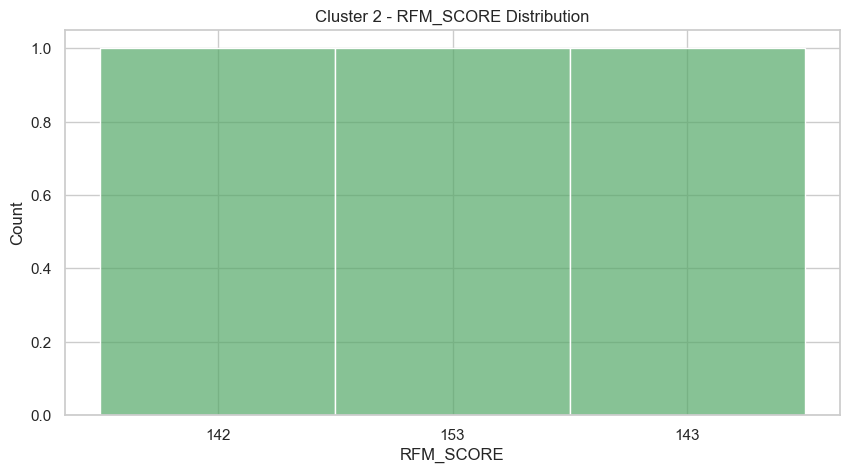

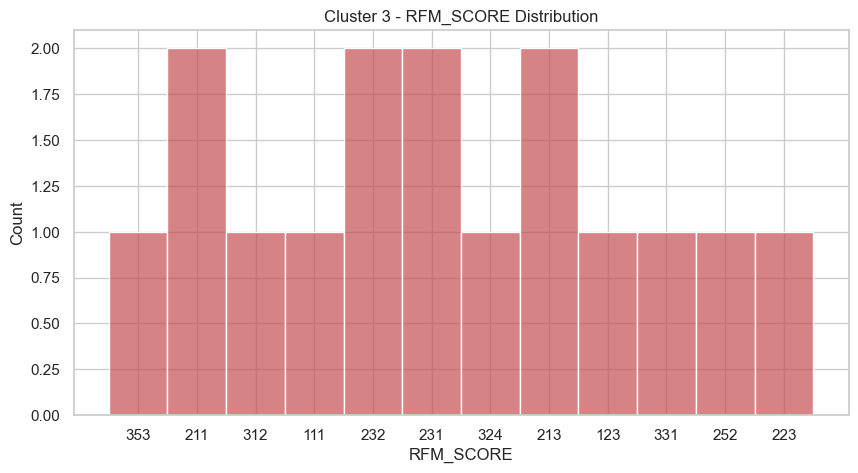

In [647]:
# Her bir küme için RFM_SCORE değerlerini içeren DataFrame
cluster_rfm_scores = d_frame.groupby('cluster')['RFM_SCORE'].apply(list).reset_index()
cluster_rfm_scores.columns = ['Cluster', 'RFM_SCOREs']

# Her bir küme için ayrı ayrı bar plot çizimi
for index, row in cluster_rfm_scores.iterrows():
    plt.figure(figsize=(10, 5))
    sns.histplot(row['RFM_SCOREs'], bins=range(1, 12), kde=False, color=f'C{row["Cluster"]}', alpha=0.7)
    plt.title(f'Cluster {int(row["Cluster"])} - RFM_SCORE Distribution')
    plt.xlabel('RFM_SCORE')
    plt.ylabel('Count')
    plt.show()


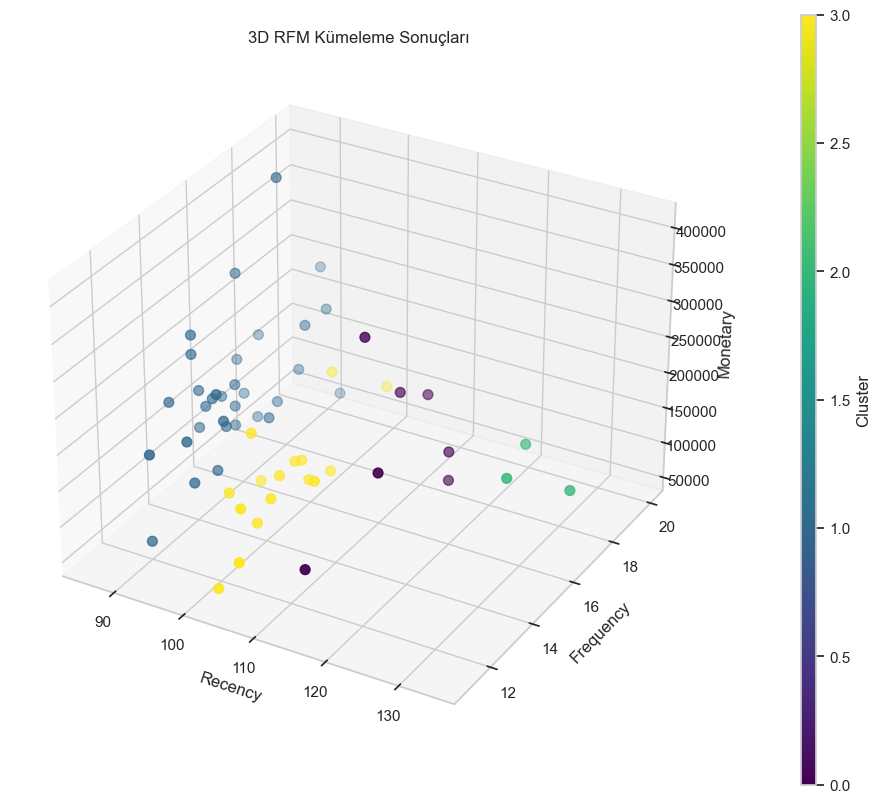

In [652]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Kümeleme sonuçlarına göre renklendirilmiş 3D scatter plot
scatter = ax.scatter(d_frame['Recency'], d_frame['Frequency'], d_frame['Monetary'], c=d_frame['cluster'], cmap='viridis', s=50)  # s parametresi noktaların büyüklüğünü kontrol eder
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Kümeleme Sonuçları')

# Renk skalasını ekleme
legend1 = fig.colorbar(scatter, ax=ax, pad=0.1, aspect=50)
legend1.set_label('Cluster')

plt.show()
